In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Weather_data.csv')

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
# Removing the extra columns in dataset
df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19]], axis = 1, inplace  = True)

In [5]:
df.head()

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [6]:
# Rename the columns name
df.columns = ['date_time','tempm']

In [7]:
df.head()

,date_time,tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [10]:
# Assigning new variable to df
df2 = df

In [11]:
df2['date_time'] = pd.to_datetime(df['date_time'])

In [12]:
df2.head()

,date_time,tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [13]:
# indexing the df2
df2.set_index('date_time',inplace=True)


In [14]:
df2.head()

,tempm
date_time,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


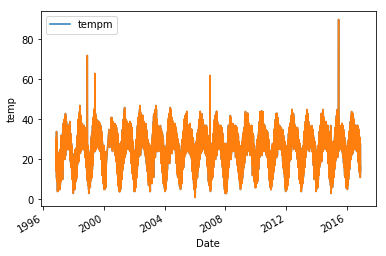

In [48]:
# plotting a graph for df2 dataset
df2.plot()

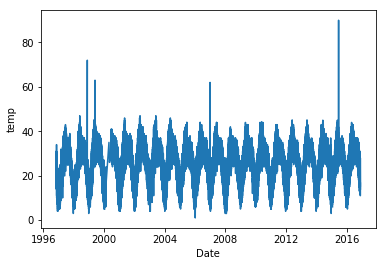

In [17]:
# Plotting a garph between data and temp
plt.xlabel('Date')
plt.ylabel('temp')
plt.plot(df2)

In [18]:
# determiing rollin statistics
rolmean = df2.rolling(window=365).mean()
rolstd = df2.rolling(window = 365).std()
print(rolmean, rolstd)

                     tempm
date_time                 
1996-11-01 11:00:00    NaN
1996-11-01 12:00:00    NaN
1996-11-01 13:00:00    NaN
1996-11-01 14:00:00    NaN
1996-11-01 16:00:00    NaN
1996-11-01 17:00:00    NaN
1996-11-01 18:00:00    NaN
1996-11-01 19:00:00    NaN
1996-11-01 20:00:00    NaN
1996-11-01 21:00:00    NaN
1996-11-01 22:00:00    NaN
1996-11-01 23:00:00    NaN
1996-11-02 00:00:00    NaN
1996-11-02 01:00:00    NaN
1996-11-02 02:00:00    NaN
1996-11-02 03:00:00    NaN
1996-11-02 04:00:00    NaN
1996-11-02 05:00:00    NaN
1996-11-02 06:00:00    NaN
1996-11-02 07:00:00    NaN
1996-11-02 08:00:00    NaN
1996-11-02 09:00:00    NaN
1996-11-02 10:00:00    NaN
1996-11-02 11:00:00    NaN
1996-11-02 12:00:00    NaN
1996-11-02 13:00:00    NaN
1996-11-02 14:00:00    NaN
1996-11-02 15:00:00    NaN
1996-11-02 16:00:00    NaN
1996-11-02 17:00:00    NaN
...                    ...
2016-11-29 10:30:00    NaN
2016-11-29 11:00:00    NaN
2016-11-29 11:30:00    NaN
2016-11-29 12:00:00    NaN
2

In [19]:
# Dropping NAN values
df2.dropna(inplace=True)

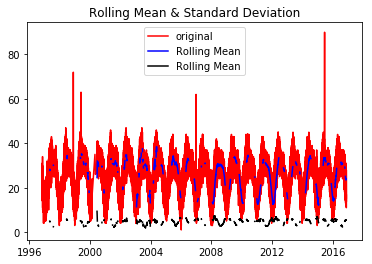

In [20]:
# Rolling mean and Standard Devaiation
orig = plt.plot(df2, color = 'red', label = 'original')
mean = plt.plot(rolmean, color = 'blue', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Mean')
plt.legend(loc ='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [21]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey-Fuller Test: ")

dftest = adfuller(df2['tempm'], autolag = "AIC") #Akaike information criterion (AIC)

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'p-value', "#Lag Used", 'Number of Observation Used'])

for key,value in dftest[4].items():
    dfoutput['critical Value (%s)'%key] = value
print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic               -7.523041e+00
p-value                       3.746839e-11
#Lag Used                     6.800000e+01
Number of Observation Used    9.817500e+04
critical Value (1%)          -3.430417e+00
critical Value (5%)          -2.861569e+00
critical Value (10%)         -2.566786e+00
dtype: float64


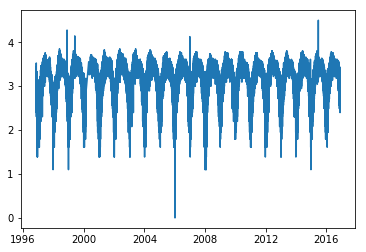

In [22]:
#Estimatting trend
indexedDataset_logScale = np.log(df2)

plt.plot(indexedDataset_logScale)

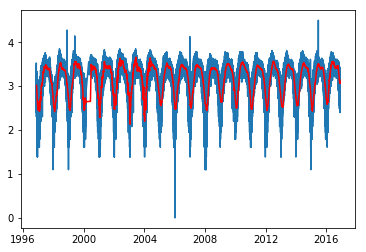

In [53]:
movingAverage = indexedDataset_logScale.rolling(window=365).mean()
movingSTD = indexedDataset_logScale.rolling(window = 365).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')
plt.show()

In [24]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

#Remove nan value
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)

,tempm
date_time,
1996-11-19 05:00:00,0.162276
1996-11-19 06:00:00,0.162888
1996-11-19 07:00:00,0.204020
1996-11-19 08:00:00,0.203908
1996-11-19 09:00:00,0.203796
1996-11-19 10:00:00,0.203568
1996-11-19 11:00:00,0.119937
1996-11-19 12:00:00,-0.070844
1996-11-19 13:00:00,-0.181491


In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=365).mean()
    movingSTD = timeseries.rolling(window = 365).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label="rolling std")
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = True)
    #Perform Dickey-fuller test

    print("Result of Dickey-Fuller Test: ")

    dftest = adfuller(df2['tempm'], autolag = "AIC") #Akaike information criterion (AIC)

    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'p-value', "#Lag Used", 'Number of Observation Used'])

    for key,value in dftest[4].items():
        dfoutput['critical Value (%s)'%key] = value
    print(dfoutput)


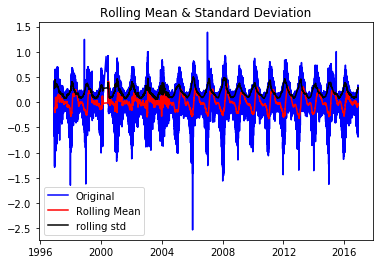

Result of Dickey-Fuller Test: 
Test Statistic               -7.523041e+00
p-value                       3.746839e-11
#Lag Used                     6.800000e+01
Number of Observation Used    9.817500e+04
critical Value (1%)          -3.430417e+00
critical Value (5%)          -2.861569e+00
critical Value (10%)         -2.566786e+00
dtype: float64


In [26]:
test_stationarity(datasetLogScaleMinusMovingAverage)

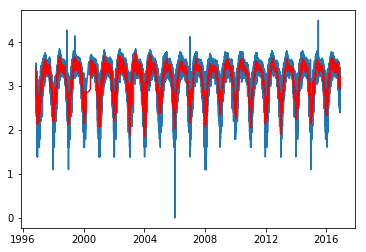

In [54]:
# trend in dataset
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')
plt.show()

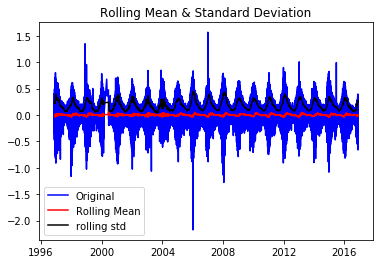

Result of Dickey-Fuller Test: 
Test Statistic               -7.523041e+00
p-value                       3.746839e-11
#Lag Used                     6.800000e+01
Number of Observation Used    9.817500e+04
critical Value (1%)          -3.430417e+00
critical Value (5%)          -2.861569e+00
critical Value (10%)         -2.566786e+00
dtype: float64


In [28]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

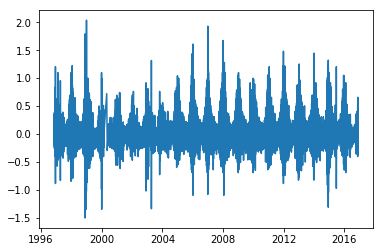

In [55]:
datasetLogDiffshifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffshifting)
plt.show()

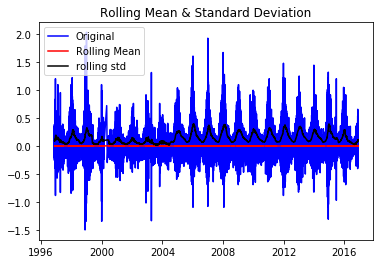

Result of Dickey-Fuller Test: 
Test Statistic               -7.523041e+00
p-value                       3.746839e-11
#Lag Used                     6.800000e+01
Number of Observation Used    9.817500e+04
critical Value (1%)          -3.430417e+00
critical Value (5%)          -2.861569e+00
critical Value (10%)         -2.566786e+00
dtype: float64


In [30]:
datasetLogDiffshifting.dropna(inplace=True)
test_stationarity(datasetLogDiffshifting)

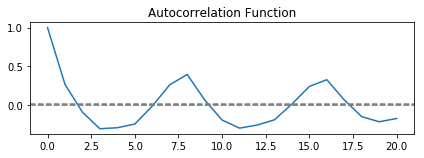

In [31]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffshifting, nlags= 20)
lag_pacf = pacf(datasetLogDiffshifting, nlags=20, method='ols')

#plot ACF
plt.subplot(211)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle='--', color = 'gray')
plt.title("Autocorrelation Function")
plt.tight_layout()



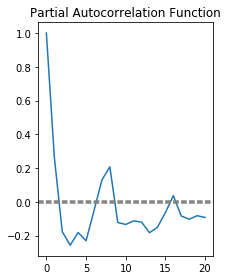

In [32]:
#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


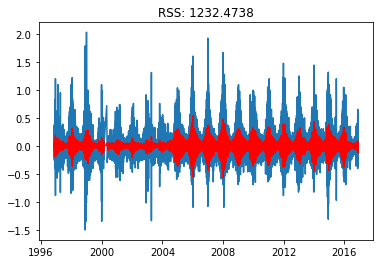

In [33]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
result_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffshifting)
plt.plot(result_AR.fittedvalues, color = 'red')
plt.title("RSS: %.4f"%sum((result_AR.fittedvalues-datasetLogDiffshifting['tempm'])**2))
print('Plotting AR model')

D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting MA model


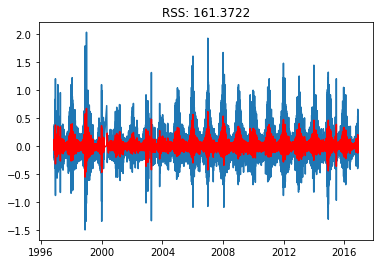

In [40]:
# MA model
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))
result_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffshifting)
plt.plot(result_MA.fittedvalues, color='red')
plt.title("RSS: %.4f"% sum((result_MA.fittedvalues)**2))
print('plotting MA model')

D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0029')

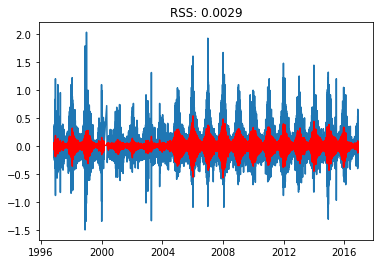

In [35]:
model = ARIMA(indexedDataset_logScale, order = (2, 1, 2))
result_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffshifting)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title("RSS: %.4f"% sum((result_ARIMA.fittedvalues-datasetLogDiffshifting['tempm']))**2)

In [41]:
predictions_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date_time
1996-11-01 12:00:00   -0.000007
1996-11-01 13:00:00   -0.016047
1996-11-01 14:00:00   -0.032303
1996-11-01 16:00:00    0.024398
1996-11-01 17:00:00    0.043645
dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['tempm'].ix[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA_log.head()

D:\anaconda\anaconda 3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date_time
1996-11-01 11:00:00    3.401197
1996-11-01 12:00:00    3.401191
1996-11-01 13:00:00    3.385151
1996-11-01 14:00:00    3.368894
1996-11-01 16:00:00    3.425595
dtype: float64

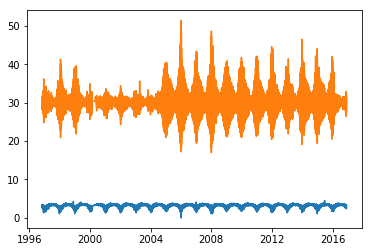

In [43]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset_logScale)
plt.plot(predictions_ARIMA)

In [44]:
indexedDataset_logScale

,tempm
date_time,
1996-11-01 11:00:00,3.401197
1996-11-01 12:00:00,3.332205
1996-11-01 13:00:00,3.178054
1996-11-01 14:00:00,3.178054
1996-11-01 16:00:00,3.135494
1996-11-01 17:00:00,3.044522
1996-11-01 18:00:00,3.044522
1996-11-01 19:00:00,3.044522
1996-11-01 20:00:00,2.944439


D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


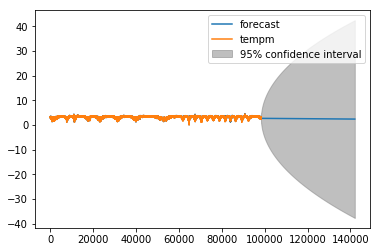

In [45]:
# According to days future prediction
result_ARIMA.plot_predict(1, 142044)
x = result_ARIMA.forecast(steps=43800)

D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
D:\anaconda\anaconda 3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


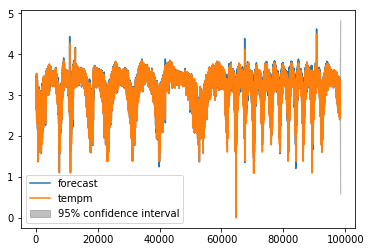

In [46]:
# For next 10 years future prediction
result_ARIMA.plot_predict(1, 98364)
x = result_ARIMA.forecast(steps=120)

In [47]:
# Future prediction in days in array form
result_ARIMA.forecast(steps=43800)

(array([2.67148283, 2.72225961, 2.76038538, ..., 2.40663795, 2.40663117,
        2.40662439]),
 array([ 0.11200471,  0.16373684,  0.19930043, ..., 20.45276838,
        20.45300186, 20.45323534]),
 array([[  2.45195764,   2.89100803],
        [  2.4013413 ,   3.04317793],
        [  2.36976372,   3.15100704],
        ...,
        [-37.68005146,  42.49332737],
        [-37.68051586,  42.4937782 ],
        [-37.68098025,  42.49422902]]))